0         0.000000
1        21.780992
2        40.578560
3        62.339328
4        83.918848
          ...     
295    5938.472448
296    5958.474496
297    5979.509760
298    5998.785280
299    6018.859008
Name: relative_time_ms, Length: 300, dtype: float64


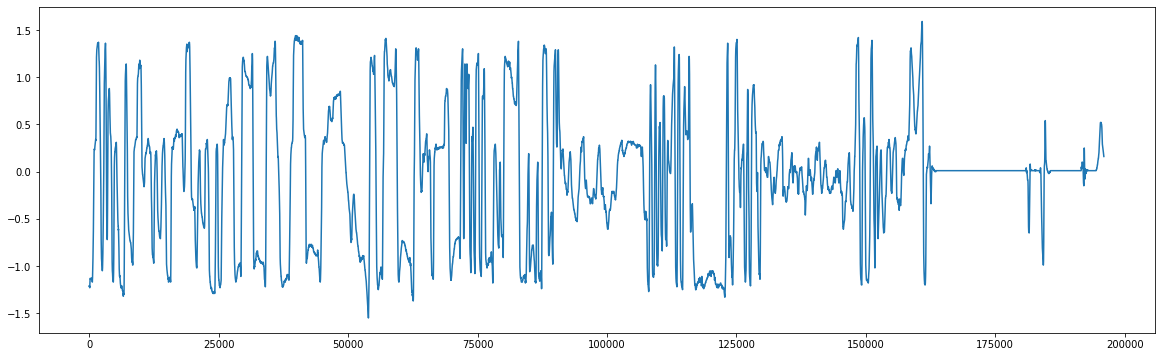

In [7]:
import pandas as pd
import numpy as np 
from time import strftime, localtime
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

data = pd.read_csv("test_imu.csv")

veloyaw = data.wz.to_numpy()
#print(veloyaw.shape)

data['timestamp_ns'] = data['sec'] * 1e9 + data['nanosec'] 

data['relative_time_ms'] = (data['timestamp_ns'] - data['timestamp_ns'].iloc[0]) / 1e6

print(data['relative_time_ms'][:300])

plt.figure(figsize=(20,6))
plt.plot(data['relative_time_ms'], data['wz'])


In [9]:
np.rad2deg(data['wz'].max())

91.1002894258009

In [10]:
data['wz'][5000]

-0.4

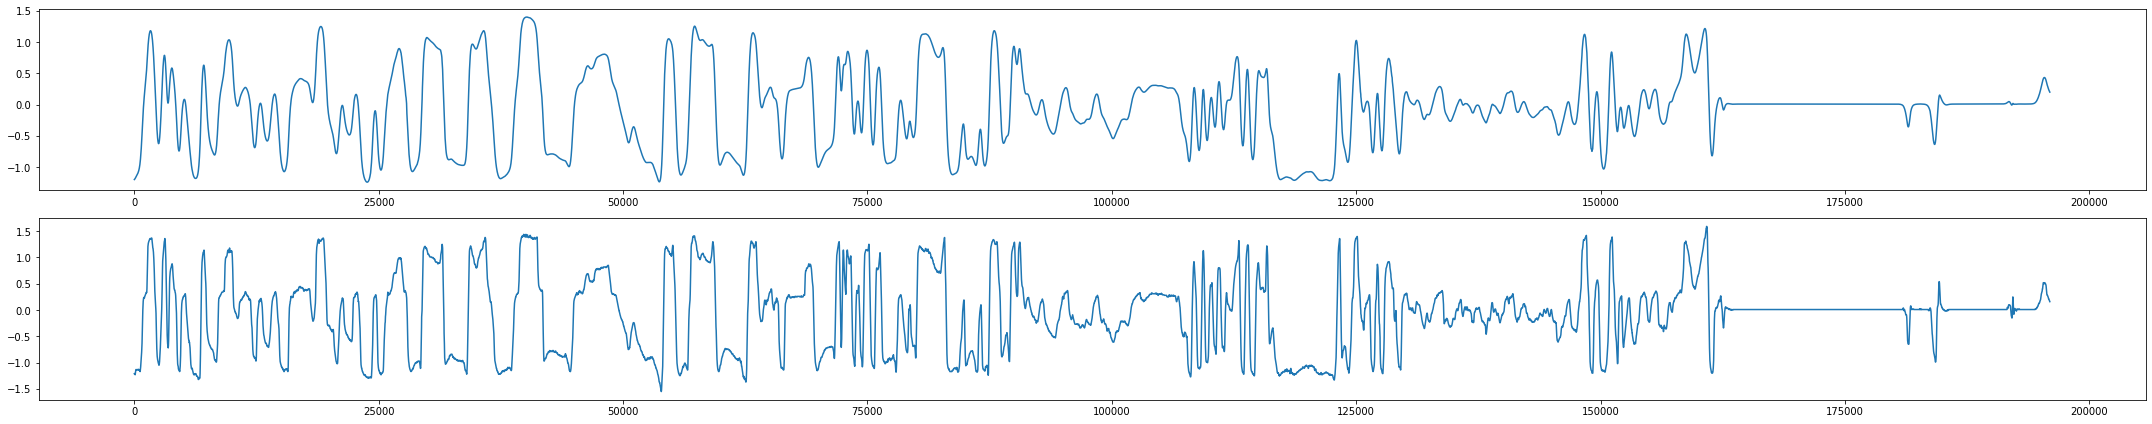

In [11]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 50  # The actual measurement frequency depends on your IMU
cutoff = 1
order = 1

# The Butterworth filter
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq

b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Here's your array of measurements
yaw_measurements = data['wz'].to_numpy()  # replace this with your array

# Apply the filter
filtered_measurements = filtfilt(b, a, yaw_measurements)

fig, axs = plt.subplots(2, 1, figsize=(30, 6))

# Plot data on each subplot
axs[0].plot(data['relative_time_ms'], filtered_measurements)
axs[1].plot(data['relative_time_ms'], data['wz'])

plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

In [12]:
######### 1/5 MEASUREMENTS
# from center of rear left wheel to center of front left wheel: 57.5 cm
# from center of front left wheel to center of front right wheel: 43 cm
# from center of front right wheelto center of rear right wheel: 57.5 cm
# from center of rear right wheel to center of rear left wheel: 43.5 cm

# center of 1/5: 21.625cm, 28.75cm

# location of center of IMU w.r.t center of rear left wheel: 22cm , 15cm
# location of center of GPS Antenna w.r.t center of rear left wheel: 22cm, -8.5cm 

In [13]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Replace this with your actual data
yaw_measurements = data['wz']

# Perform the Fourier Transform to get the frequency spectrum
N = len(yaw_measurements)
T = 1.0 / 50.0  # Sample spacing (50 Hz)
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(yaw_measurements)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# Plot the frequency spectrum
plt.figure(figsize=(20,6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

AttributeError: 'Series' object has no attribute 'flags'

In [14]:
!pip install --upgrade pandas

     ---------------------------------------- 10.0/10.0 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\francisco\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\~andas\\_libs\\algos.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
